# <center>Data Science 2 - Assignment 2<center>
    
<center>Created by Zsófia Rebeka Katona<center>

---

### Assignment 2
#### 1.1 General information
You are required to submit two files to Moodle: an .ipynb file and the rendered .pdf file with
your solutions. Do not zip them together so I will be able to annotate the .pdf directly.
Please give short (2-3 sentences) interpretations / explanations to your answers, not only the
program code and outputs. Be concise and focused (less could be more ;)).
Grades will be distributed with the following rule: from the points you earn, you get 100% if you
submit until the due date (2024-04-05 20:00), 50% within 24 hours past due date, and 0% after
that.


#### 1.2 Classify fashion images on the MNIST data (20 points)
Take the alternative version of the famous “MNIST dataset”, which consists of images of Zalando’s
articles. Your task is to correctly classify the images into one of the ten categories, such as dress
or shirt. The images are in exactly the same format as we saw for the handwritten digits: 28x28
pixel grayscale images. The task is to build deep neural network models to predict the items. You
can use either sklearn or keras; to get the data, go to the corresponding Kaggle page or use
the fashion_mnist.load_data() function from the keras.datasets module. Make sure you split
the training set into two sets: one for training your models on and one for validation and model
selection. You can work with a relatively small train set if you have computational problems.

### What would be an appropriate metric to evaluate your models? Why? (Hint: No code required.) (2 points)
---
There are several ways to evaluate predictive models. However, the most appropriate metric could be using accuracy. Accuracy is important, as it shows the level of reliability and effectiveness of the predictive models. If we obtain a validation set during data splitting, we could also use validation accuracy, which tells us how well the models generalize to unseen data. Accuracy serves as a good indicator in predictive modeling, because it provides a clear indication of the model's ability to correctly classify instances, especially where the cost of misclassification is high.

### Get the data and show some example images from the data. (2 points) 

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Model

In [2]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Converting the output to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=20240405)

print(f"Size of training sets: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Size of validation sets: X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"Size of test sets: X_test:  {X_test.shape}, y_test:  {y_test.shape}")

Size of training sets: X_train: (48000, 28, 28), y_train: (48000, 10)
Size of validation sets: X_val:   (12000, 28, 28), y_val:   (12000, 10)
Size of test sets: X_test:  (10000, 28, 28), y_test:  (10000, 10)


Training images:


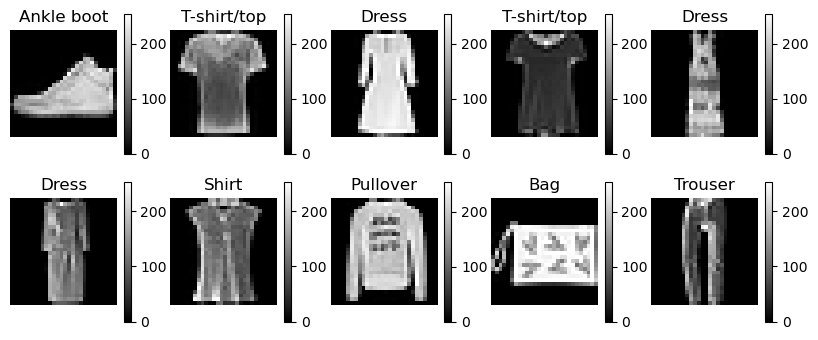

Validation images:


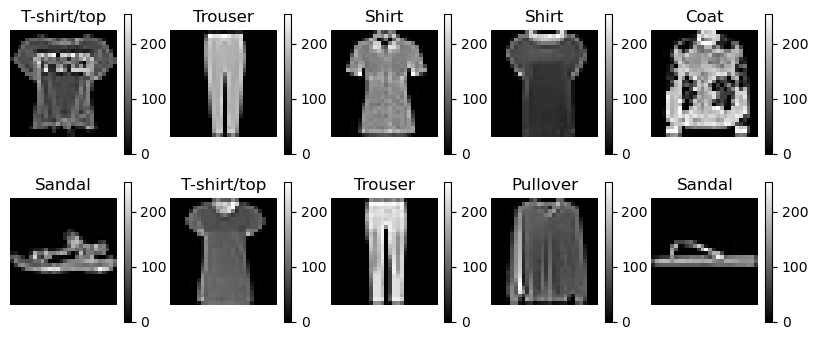

Test images:


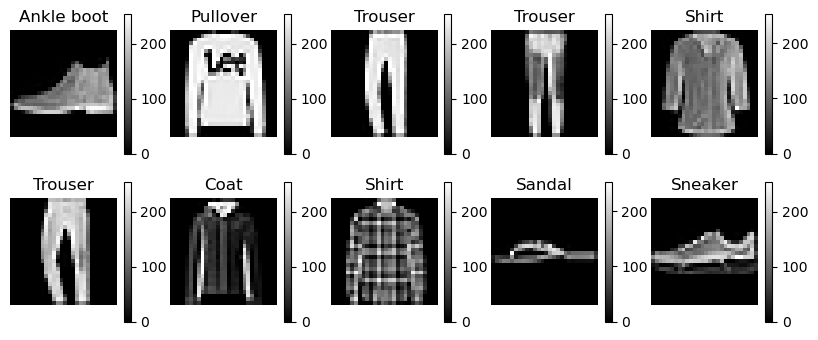

In [3]:
# Defining class names for the labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Labelling the items with the clothing names
clothing_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# Creating a list of datasets and their corresponding titles
datasets = [(X_train, y_train, "Training Images"), (X_val, y_val, "Validation Images"), (X_test, y_test, "Test Images")]

# Iterating over the training, validation and test datasets
def show_images(images, labels, nrows = 1, ncols = 5, class_names = None):
    """"Display the images and their labels"""
    plt.figure(figsize = (10, 2 * nrows))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], cmap = "gray")
        plt.colorbar()
        if class_names is not None:
            plt.title(class_names[np.argmax(labels[i])])
        else:
            plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

# Printing the images
print("Training images:")
show_images(X_train, y_train, nrows = 2, ncols = 5, class_names = class_names)

print("Validation images:")
show_images(X_val, y_val, nrows = 2, ncols = 5, class_names = class_names)

print("Test images:")
show_images(X_test, y_test, nrows = 2, ncols = 5, class_names = class_names)

### Train a simple fully connected single hidden layer network to predict the items. Remember to normalize the data similar to what we did in class. Make sure that you use enough epochs so that the validation error begins to level off - provide a plot of the training history. (2 points) 

In [4]:
# Building a simple fully connected hidden layer network
model = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing the model summary
print(model.summary())

C:\Users\Zsófi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7817 - loss: 0.6300 - val_accuracy: 0.8508 - val_loss: 0.4231
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8635 - loss: 0.3826 - val_accuracy: 0.8657 - val_loss: 0.3662
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8743 - loss: 0.3411 - val_accuracy: 0.8497 - val_loss: 0.3981
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8854 - loss: 0.3099 - val_accuracy: 0.8838 - val_loss: 0.3230
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8937 - loss: 0.2829 - val_accuracy: 0.8817 - val_loss: 0.3219
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8980 - loss: 0.2776 - val_accuracy: 0.8858 - val_loss: 0.3109
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9051 - loss: 0.2588 - val_accuracy: 0.8743 - val_loss: 0.3380
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9085 - loss: 0.2478 - 

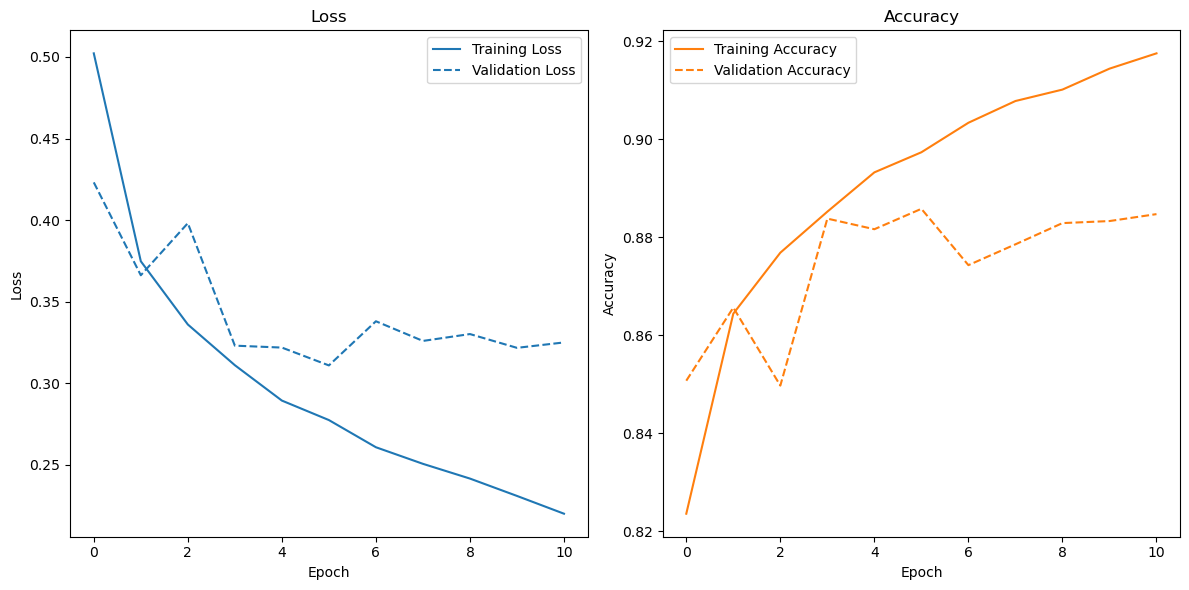

In [5]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Defining a function to plot history
def plot_history(history):
    """
    Plot training and validation loss, and accuracy for the given history.

    Args:
    - history: History object returned by the model.fit() method.

    Returns:
    - None
    """
    color_palette = ['#1f77b4', '#ff7f0e']
    plt.figure(figsize=(12, 6))

    # Plotting the training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color=color_palette[0])
    plt.plot(history.history['val_loss'], label='Validation Loss', color=color_palette[0], linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    # Plotting the training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color=color_palette[1])
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color=color_palette[1], linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.tight_layout()
    plt.show()

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history)

The plot illustrates that the training loss in the first model is consistently decreasing. This is true for the rest of the models in this analysis. Initially, both the training and validation loss decrease steadily, indicating that the model is learning and improving its performance on both the training and validation datasets. Around the 4th epoch the validation loss starts to level off, suggesting that the model's improvement on the validation data is slowing down. This suggests that the model starts to overfit to the training data. Despite the validation loss leveling off, the training loss continues to decrease, showing that the model is still learning from the training data. While the training accuracy continues to increase over the epochs, as of the 4th epoch, the validation accuracy remains around 0.88. Due to the EarlyStopping, the model stops at an earlier, indicating that the model's performance on validation model has reached its peak.

### Experiment with different network architectures and settings (number of hidden layers, number of nodes, regularization, etc.). Train at least 3 models. Explain what you have tried and how it worked. (6 points) 

### Second model: Adding the Dropout
---

In [6]:
# Setting the network
model_2 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'),
    # Adding a Dropout of 0.5
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7279 - loss: 0.7626 - val_accuracy: 0.8447 - val_loss: 0.4235
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8341 - loss: 0.4604 - val_accuracy: 0.8592 - val_loss: 0.3832
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8457 - loss: 0.4304 - val_accuracy: 0.8634 - val_loss: 0.3725
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8474 - loss: 0.4125 - val_accuracy: 0.8661 - val_loss: 0.3612
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8565 - loss: 0.3898 - val_accuracy: 0.8732 - val_loss: 0.3461
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8591 - loss: 0.3814 - val_accuracy: 0.8684 - val_loss: 0.3550
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8658 - loss: 0.3650 - val_accuracy: 0.8743 - val_loss: 0.3435
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8669 - loss: 0.3599 -

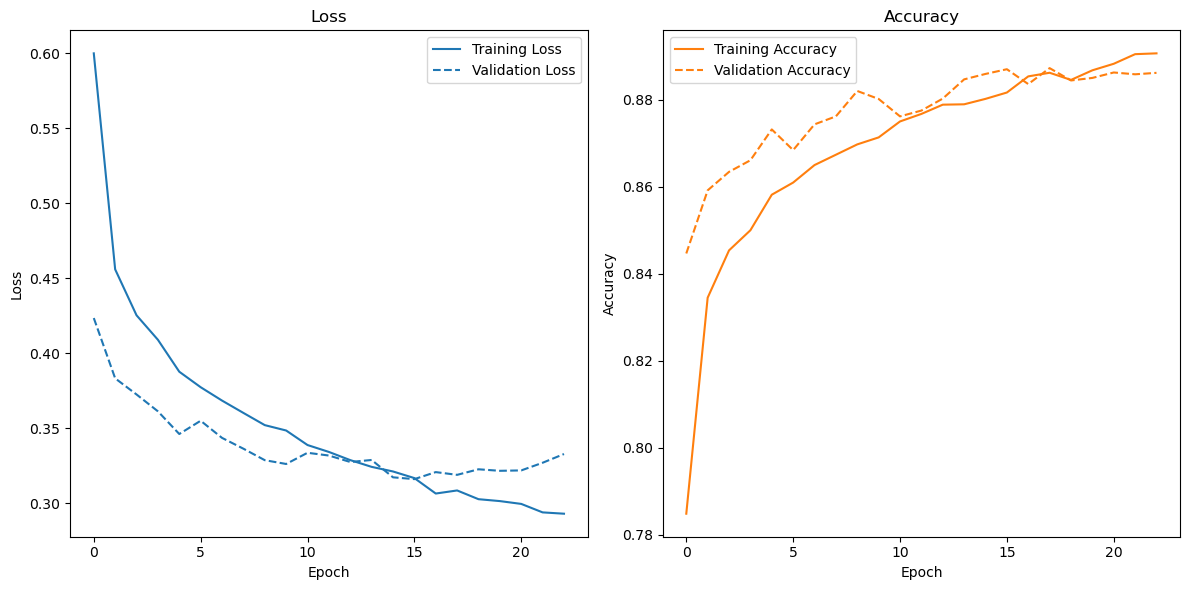

In [7]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_2 = model_2.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_2)

By adding a 0.5 Dropout layer, we dropped a unit at training time with a 0.5 probability, which resulted in the decrease of both the training and validation loss. This indicates that the dropout regulated the model and prevented it from overfitting. The validation loss being lower than training loss, which can also be the result of the droput as it the training loss is calculated with the dropout. The fluctuatiation in the validation loss after the 4th epoch likely to show that the model is adjusting to the dropout regularization and finding a better balance between fitting the training data and regularizing and finding a better balance between fitting the training data and generalizing to unseen validation data. Unlike the other models, the validation accuracy is predominantly higher than the training accuracy. The similar scores suggest that while this model is still overfitting, it's performing consistently on both datasets. Due to EarlyStopping, the model stops at an earlier epoch.

### Third model: Increasing the number of nodes in the hidden layer
---

In [8]:
# Setting the network
model_3 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    # Increasing the number of nodes from 256 to 512
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_3.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7843 - loss: 0.6139 - val_accuracy: 0.8450 - val_loss: 0.4212
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8614 - loss: 0.3781 - val_accuracy: 0.8773 - val_loss: 0.3428
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8818 - loss: 0.3246 - val_accuracy: 0.8733 - val_loss: 0.3558
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8898 - loss: 0.3003 - val_accuracy: 0.8738 - val_loss: 0.3475
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8930 - loss: 0.2909 - val_accuracy: 0.8805 - val_loss: 0.3259
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8971 - loss: 0.2740 - val_accuracy: 0.8827 - val_loss: 0.3293
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9036 - loss: 0.2525 - val_accuracy: 0.8875 - val_loss: 0.3171
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9074 - loss: 0.2

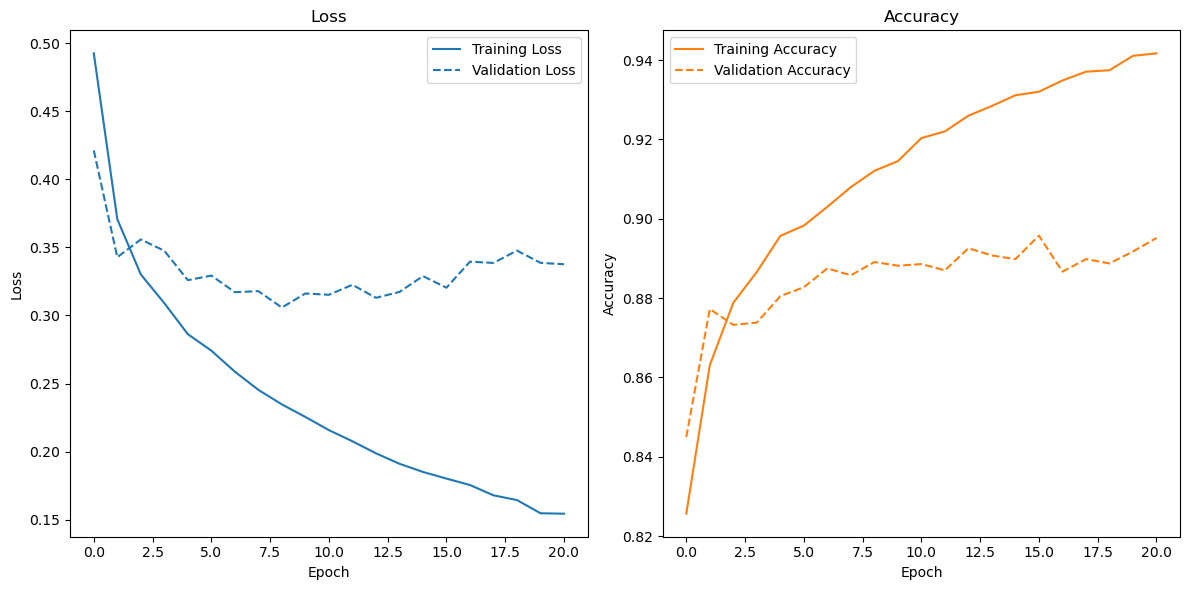

In [9]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_3 = model_3.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_3)

The third model exhibits a similar behaviour to the first model, where the training loss gradually decreases and the validation loss levels off at an earlier epoch. However, unlike the first model, the validation loss does not decrease along the training loss but it begins to level off when the loss reaches 0.33, indicating where the model's improvement on the validation data is slowing down. In theory, by adding more nodes, we increase the capacity of the model to learn with more training data. But in practice, by adding double the amount of nodes to the first hidden layer, the model might have become too complex, leading to overfitting. This increased complexity allows the model to capture more intricate patterns in the training data but perhaps also results in memorization of noise, decreasing its performance. However, the final training loss decreases further (0.15) than the loss in the previous models, which can be the result of increased node sizes.

### Fourth model: Increasing the number of layers with a sigmoid activation function and the same number of nodes
---

In [10]:
# Setting the network
model_4 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'),
    # Adding another hidden layer with a sigmoid activation function
    Dense(256, activation = 'sigmoid'),
    Dense(10, activation='softmax')
])

# Compiling the model
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_4.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7723 - loss: 0.6520 - val_accuracy: 0.8518 - val_loss: 0.3957
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8642 - loss: 0.3687 - val_accuracy: 0.8688 - val_loss: 0.3603
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8773 - loss: 0.3306 - val_accuracy: 0.8764 - val_loss: 0.3374
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8866 - loss: 0.3031 - val_accuracy: 0.8681 - val_loss: 0.3508
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8942 - loss: 0.2841 - val_accuracy: 0.8758 - val_loss: 0.3388
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9023 - loss: 0.2646 - val_accuracy: 0.8783 - val_loss: 0.3316
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9035 - loss: 0.2549 - val_accuracy: 0.8791 - val_loss: 0.3288
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9123 - loss: 0.2366 - 

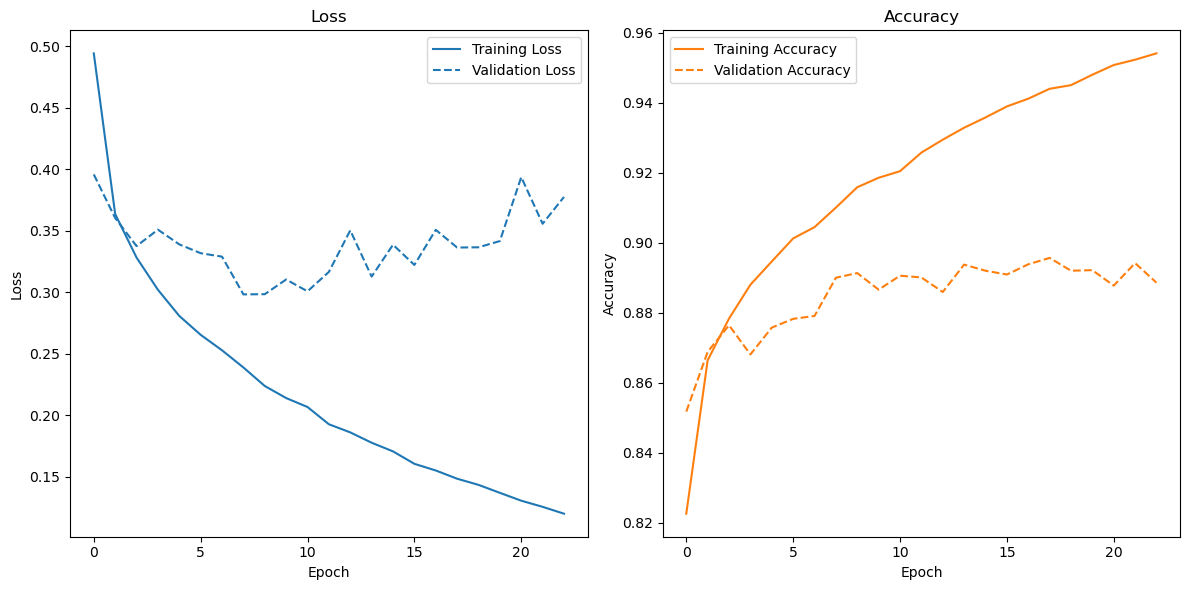

In [11]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_4 = model_4.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_4)

The fourth model obtains two hidden layers, one with a relu and the other with a sigmoid activation function, each containing 256 nodes. The fourth model exhibits a similar behaviour to the first and the third model. The training loss gradually increases, while the validation loss levels off at an earlier epoch. This indicates that by adding another more trainable parameter with the sigmoid activation function does not improve the model's performance. Moreover, it makes the model architecture too complex, leading to overfitting. Despite achieving a high training accuracy score, and the lowest training loss among the networks without convolution, the validation loss is still performing similarly to the previous models. This serves as another reason that the extra layer leads to overfitting. The EarlyStopping is only triggered at a later epoch, suggesting that the model required more iterations to find its peak.

### Fifth model: Combining the previous additions
#### Increasing the number of nodes, adding a dropout, another hidden layer and a learning rate to adam
---

In [12]:
# Setting the network
model_5 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    # Doubling the number of nodes with ReLU activation function
    Dense(512, activation='relu'),
    # Adding another layer with the sigmoid function
    Dense(256, activation = 'sigmoid'),
    # Adding a Dropout of 0.5
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Setting the learning rate for the adam optimizer
adam_optimizer = Adam(learning_rate=0.001)

# Compiling the model
model_5.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model_5.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7360 - loss: 0.7342 - val_accuracy: 0.8372 - val_loss: 0.4344
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8575 - loss: 0.3906 - val_accuracy: 0.8670 - val_loss: 0.3628
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8742 - loss: 0.3482 - val_accuracy: 0.8713 - val_loss: 0.3429
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8826 - loss: 0.3205 - val_accuracy: 0.8788 - val_loss: 0.3257
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8898 - loss: 0.3013 - val_accuracy: 0.8791 - val_loss: 0.3221
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8950 - loss: 0.2816 - val_accuracy: 0.8839 - val_loss: 0.3071
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9003 - loss: 0.2687 - val_accuracy: 0.8855 - val_loss: 0.3166
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9028 - loss: 0

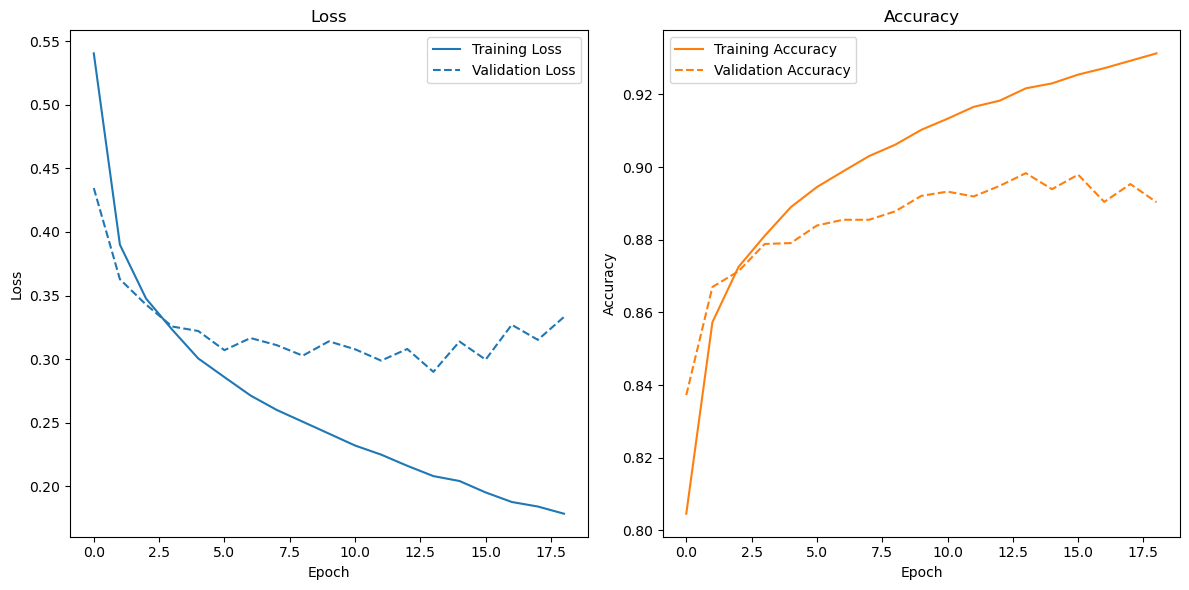

In [13]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_5 = model_5.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_5)

According to the plot and the accuracy scores, combining all the previous models' features doesn't improve the model significantly. While we can see a higher training accuracy, the 4th model validation accuracy overranks this model's validation accuracy. The plot exhibits a similar trend in terms of training and validaiton loss. The validation loss begins to level off at an earlier epoch, suggesting overfitting. Combining a higher number of nodes, adding a dropout layer and adding another hidden layer resulted in a lower validation loss, but also in lower accuracies. This suggests that the model architecture became too complex.

### (6 points) Try to improve the accuracy of your model by using convolution. Train at least two different models (you can vary the number of convolutional and pooling layers or whether you include a fully connected layer before the output, etc.).

### 6th model: Increased depth
---

In [14]:
# Setting the network
model_6 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    # Convolutional layer with 32 filters and a 3x3 kernel size
    Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with a 2x2 pool size
    MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters and a 3x3 kernel size
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Convolutional layer with 128 filters and a 3x3 kernel size,
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    # Dense (fully connected) layer with 128 neurons
    Dense(128, activation='relu'),
    # Dropout layer of 0.5 to reduce overfitting
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the model
model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_6.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7001 - loss: 0.8201 - val_accuracy: 0.8643 - val_loss: 0.3615
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8605 - loss: 0.3878 - val_accuracy: 0.8843 - val_loss: 0.3140
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8848 - loss: 0.3249 - val_accuracy: 0.8971 - val_loss: 0.2790
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8987 - loss: 0.2848 - val_accuracy: 0.8997 - val_loss: 0.2685
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9064 - loss: 0.2567 - val_accuracy: 0.9022 - val_loss: 0.2634
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9151 - loss: 0.2324 - val_accuracy: 0.9082 - val_loss: 0.2501
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9204 - loss: 0.2182 - val_accuracy: 0.9020 - val_loss: 0.2610
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - accuracy: 0.9266 -

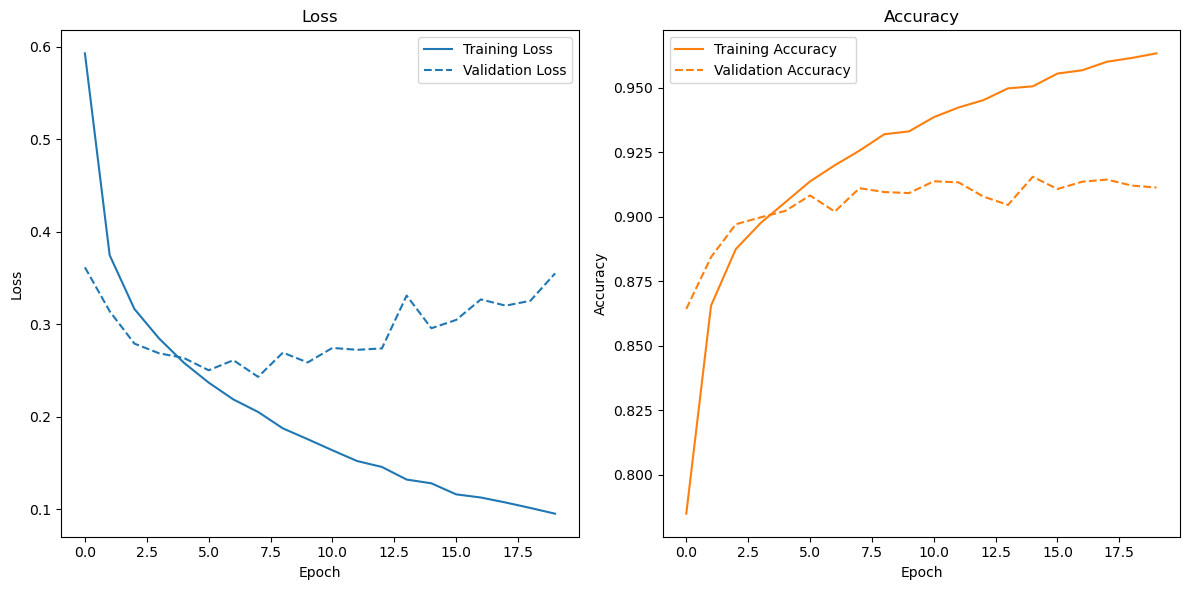

In [15]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_6 = model_6.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_6)

The model consists of three convolutional layers followed by max pooling layers to extract features, followed by a flatten layer to convert the 2D feature maps into a vector. It then includes a dense layer with 128 neurons and a ReLU activation function, along with a dropout layer. Adding more convolutional layers, we sort of regularize the model and enhance its ability to learn discriminative features from input images. MaxPooling can reduce dimensionality, which can also prevent overfitting. 

Despite the training loss decreasing, the validation loss begins to increase at an early epoch and the EarlyStopping callback is triggered too, indicating potential overfitting. However, by adding convolutional layers, the model's accuracy scores visibly improve, indicating good generalization performance.

### 7th model: Increased Width
---

In [16]:
# Setting the network
model_7 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    # Convolutional layer with 32 filters and a 3x3 kernel size
    Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with a 2x2 pool size
    MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters and a 3x3 kernel size
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense layers with 512, 256, and 128 neurons respectively, with relu activation
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    # Dropout layer of 0.5 to reduce overfitting
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_7.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,004,042 (3.83 MB)

 Trainable params: 1,004,042 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7154 - loss: 0.7662 - val_accuracy: 0.8760 - val_loss: 0.3407
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8792 - loss: 0.3414 - val_accuracy: 0.8852 - val_loss: 0.3111
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.8947 - loss: 0.2908 - val_accuracy: 0.8902 - val_loss: 0.3012
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9103 - loss: 0.2515 - val_accuracy: 0.9068 - val_loss: 0.2569
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9208 - loss: 0.2223 - val_accuracy: 0.9017 - val_loss: 0.2794
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9288 - loss: 0.1928 - val_accuracy: 0.9061 - val_loss: 0.2708
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9378 - loss: 0.1708 - val_accuracy: 0.9059 - val_loss: 0.2810
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.9472 -

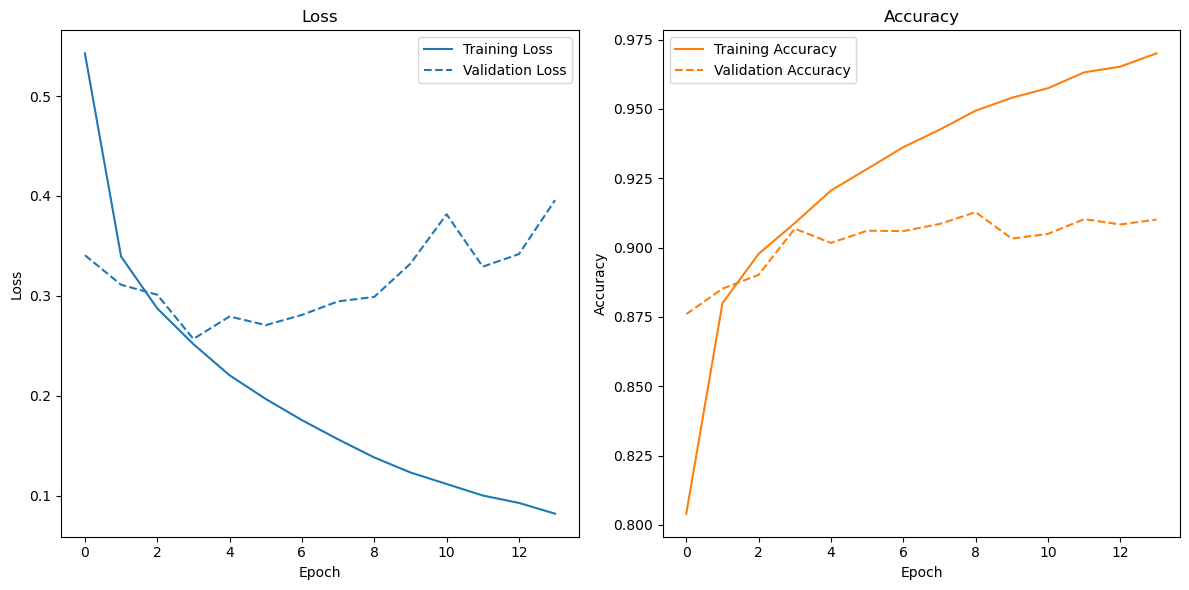

In [17]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_7 = model_7.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_7)

The 7th model obtains an increased width: it consists of three dense layers with 512, 256, and 128 neurons respectively, all using the ReLU activation function. The validation loss levels out earlier than the previous models and the EarlyStopping is triggered early on too. This indicates and the early levelling out indicate that the model may be prone to overfitting the training data, as it quickly reaches its peak performance on the validation set and doesn't improve further with additional epochs. Moreover, the increase in the validation loss suggests that the model may not generalize well to unseen data.

### 8th model: Increased Depth and Width
---

In [46]:
# Setting the network
model_8 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense layers with 512 neurons, with relu activation
    Dense(512, activation='relu'),
    # Dropout layer of 0.7 to reduce overfitting
    Dropout(0.4),
    # Dense layer with 256 neurons, with relu activation
    Dense(256, activation='relu'),
    # Dropout layer of 0.7 to reduce overfitting
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_8.summary())

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 972,426 (3.71 MB)

 Trainable params: 972,426 (3.71 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 109s 68ms/step - accuracy: 0.6314 - loss: 1.0110 - val_accuracy: 0.8569 - val_loss: 0.3881
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 138s 65ms/step - accuracy: 0.8358 - loss: 0.4683 - val_accuracy: 0.8775 - val_loss: 0.3337
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 120s 50ms/step - accuracy: 0.8670 - loss: 0.3764 - val_accuracy: 0.8892 - val_loss: 0.3001
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 103s 69ms/step - accuracy: 0.8754 - loss: 0.3488 - val_accuracy: 0.8970 - val_loss: 0.2816
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 115s 77ms/step - accuracy: 0.8878 - loss: 0.3195 - val_accuracy: 0.8949 - val_loss: 0.2778
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 108s 72ms/step - accuracy: 0.8940 - loss: 0.2962 - val_accuracy: 0.9032 - val_loss: 0.2703
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 61ms/step - accuracy: 0.9025 - loss: 0.2800 - val_accuracy: 0.9072 - val_loss: 0.2546
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 169s 79ms/step - accuracy: 0

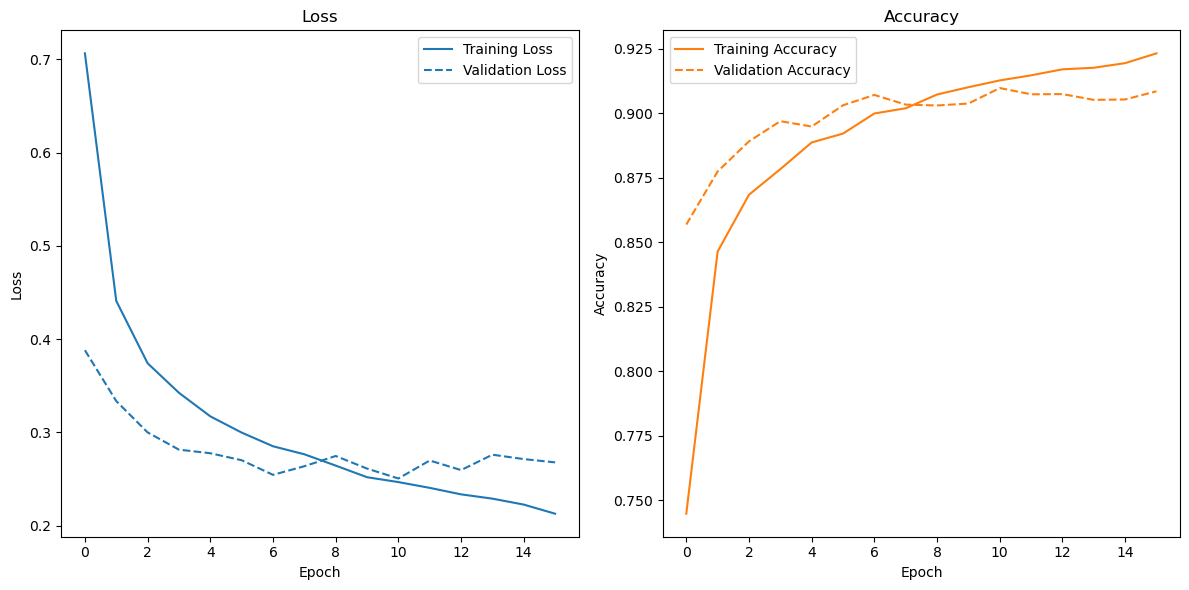

In [47]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_8 = model_8.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_8)

In this model, I combined the increased width with increased depth, adding two convolutional layers, two hidden layers wiuth ReLU, and a Dropout of 0.5. Similary to the 7th model, the validation loss levels out at an early epoch. The training accuracy is lower than the 7th model's. In this model, the validation loss doesn't increase as much as in the other models, suggesting  that the model's generalization capability to unseen data might be slightly better compared to previous models, despite its lower training accuracy.

### *(Optional for 5 points) Try to use a pre-trained network to improve accuracy*

In [43]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a function to resize the images
def resize_images(images, size=(32, 32)):
    """
    Resize images to a specified size.

    Parameters:
        images (numpy.ndarray): Array of images.
        size (tuple): Target size for resizing. Default is (32, 32).

    Returns:
        numpy.ndarray: Resized images.
    """
    resized_images = []
    for image in images:
        resized_image = resize(image, size, anti_aliasing=True)
        resized_images.append(resized_image)
    return np.array(resized_images)

# Resizing the fmnist images
X_train_resized = resize_images(X_train)
X_val_resized = resize_images(X_val)
X_test_resized = resize_images(X_test)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resized, y_train, epochs=10, validation_data=(X_val_resized, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

C:\Users\Zsófi\AppData\Local\Temp\ipykernel_3160\3511127148.py:31: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/10


ValueError: Exception encountered when calling Functional.call().

[1mKernel shape must have the same length as input, but received kernel of shape (3, 3, 32, 32) and input of shape (32, 32, 32).[0m

Arguments received by Functional.call():
  • args=('<KerasTensor shape=(32, 32, 32), dtype=float32, sparse=None, name=keras_tensor_1451>',)
  • kwargs={'mask': 'None'}

### Select a final model and evaluate it on the test set. How does the test error compare to the validation error? (2 points) 

In [49]:
# Creating a list of the models
models = [model, model_2, model_3, model_4, model_5, model_6, model_7, model_8]

# Initalizing a list to store MSEs
mses = []

# Looping through each model
for i, model in enumerate(models):
    # Predicting the labels for the test set using the model
    y_pred = model.predict(X_test)
    
    # Calculating the mean squared error between the predicted and actual labels
    mse = mean_squared_error(y_test, y_pred)
    
    # Appending the MSE to the list
    mses.append(mse)

# Creating a DataFrame to store the MSE values
mse_df = pd.DataFrame({'Model': range(1, len(models)+1), 'MSE score': mses})

ValueError: Sequential model 'sequential_16' has already been configured to use input shape (32, 32, 32). You cannot build it with input_shape (32, 28, 28)

In [25]:
# Defining a list to store the histories of each model
all_histories = [history, history_2, history_3, history_4, history_5, history_6, history_7, history_8]

# Initializing an empty list to store the last scores
last_scores_list = []

# Iterate over each model's history
for i, history in enumerate(all_histories, start=1):
    # Get the last scores from the history
    last_epoch = len(history.epoch) - 1
    last_scores_list.append({
        'Model': f'Model {i}',
        'Training Accuracy': history.history['accuracy'][last_epoch],
        'Training Loss': history.history['loss'][last_epoch],
        'Validation Accuracy': history.history['val_accuracy'][last_epoch],
        'Validation Loss': history.history['val_loss'][last_epoch]
    })

# Create a pandas DataFrame from the list
last_scores_df = pd.DataFrame(last_scores_list)

# Appending it the mse dataframe
merged_df = merged_df = pd.concat([last_scores_df, mse_df["MSE score"]], axis=1)
merged_df

,Model,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss,MSE score
0,Model 1,0.950042,0.135506,0.912500,0.306532,0.017338
1,Model 2,0.890646,0.292933,0.886167,0.332750,0.016950
2,Model 3,0.941688,0.154366,0.895167,0.337592,0.016138
3,Model 4,0.954104,0.119801,0.888583,0.377396,0.016757
4,Model 5,0.931313,0.178587,0.890333,0.333196,0.015342
5,Model 6,0.963375,0.094938,0.911333,0.354983,0.013458
6,Model 7,0.970021,0.082065,0.910083,0.395889,0.014276
7,Model 8,0.950042,0.135506,0.912500,0.306532,0.013320


All the models performance can be considered consistent in terms of accuracy and MSE. The trend among all models in the training losses is also consistent. The models with the highest accuracies are model 6 and model 7. While the lowest training loss is obtained by model 7, this model also has the highest validation loss score. All the models obtain higher training accuracies compared to validation accuracies, implying that all models are overfitted to the training data and rather than generalizing to the unseen data, they memorize it. The model with the lowest MSE score is Model 8, also obtaining a high accuracy and validation accuracy score. By adding convolutional layers to our network, we can see a model improvement in the form of higher accuracy scores. However, one thing that can be observed with CNN is the increase of validation loss as epochs increase. This can be due to the higher complexity and more parameters CNN models obtain compared to non-CNN models. Moreover, perhaps the regularization techniques might not be properly applied or tuned, which contributes to overfitting.

Very interesting that despite the substantial difference in complexity, the first model and the last, most complex CNN model produce very similar scores. One reason can be that the fashion mnist dataset is not complex enough to benefit from such a complex network, like Model 8 and utilize all of its parameters. I originally used a Dropout value of 0.5, which I later changed to 0.7, because I assumed that not using the optimal dropout rate can lead to a similar performance to a simple model, like Model 1. Regardless, according to the MSE and the validation accuracy, **Model 8 can be considered the best**.

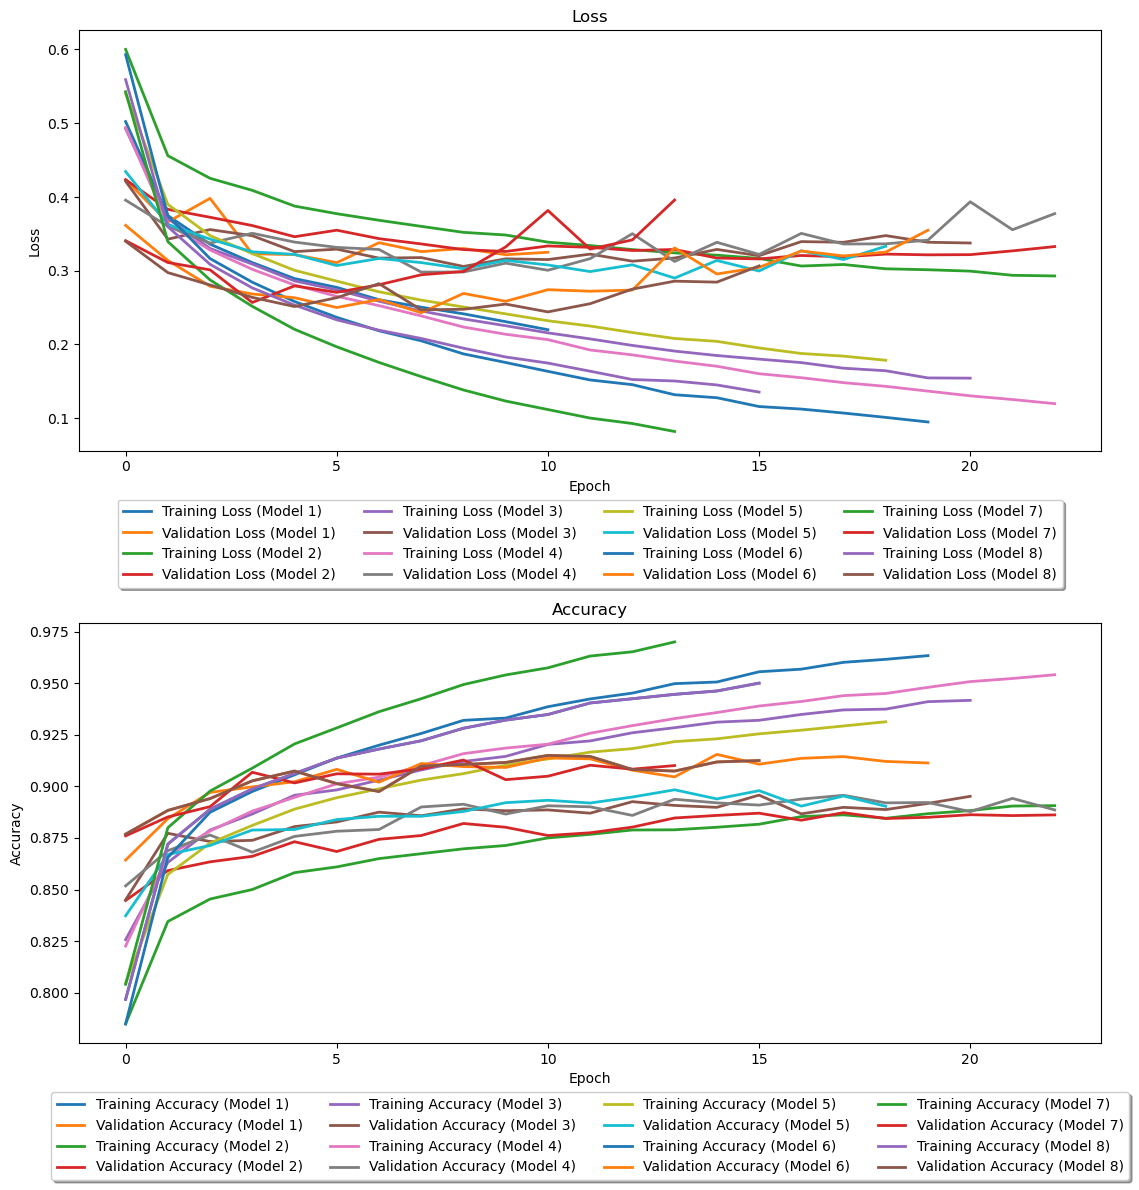

In [22]:
# Plot training and validation loss for each model
plt.figure(figsize=(12, 12))

# Plot training and validation loss
plt.subplot(2, 1, 1)
for i, history in enumerate([history, history_2, history_3, history_4, history_5, history_6, history_7, history_8]):
    plt.plot(history.history['loss'], label=f'Training Loss (Model {i+1})', linewidth=2.0)
    plt.plot(history.history['val_loss'], label=f'Validation Loss (Model {i+1})', linewidth=2.0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.title('Loss')

# Plot training and validation accuracy
plt.subplot(2, 1, 2)
for i, history in enumerate([history, history_2, history_3, history_4, history_5, history_6, history_7, history_8]):
    plt.plot(history.history['accuracy'], label=f'Training Accuracy (Model {i+1})', linewidth=2.0)
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (Model {i+1})', linewidth=2.0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [48]:
# Initializing an empty dictionary to store the last scores of each model
last_scores = {}

# Iterating over each model's history
for i, history in enumerate(all_histories, start=1):
    # Get the last scores from the history
    last_epoch = len(history.epoch) - 1
    last_scores[f'Model {i}'] = {
        'accuracy': history.history['accuracy'][last_epoch],
        'loss': history.history['loss'][last_epoch],
        'val_accuracy': history.history['val_accuracy'][last_epoch],
        'val_loss': history.history['val_loss'][last_epoch]
    }

# Plotting
plt.figure(figsize=(10, 6))
x = range(len(last_scores))
bar_width = 0.2
opacity = 0.8

metrics = ['Accuracy', 'Loss', 'Validation accuracy', 'Validation loss']
colors = sns.color_palette("hls", 8)

for i, (metric, color) in enumerate(zip(metrics, colors)):
    plt.bar([pos + i * bar_width for pos in x], [last_scores[model][metric] for model in last_scores], bar_width,
            alpha=opacity, color=color, label=metric)

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Last Scores of Each Model')
plt.xticks([pos + 1.5 * bar_width for pos in x], last_scores.keys())
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

# Add grids
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

KeyError: 'Accuracy'

<Figure size 1000x600 with 0 Axes>